# Autoencoders for image compression

## Linear autoencoder

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
tf.__version__

'2.9.2'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

### Visualizing the images

In [8]:
np.random.randint(0, 59999)

6156

In [9]:
i = np.random.randint(0, 59999)
print(y_train[i])

7


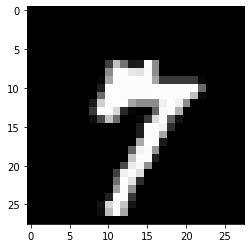

In [10]:
plt.imshow(x_train[i], cmap = 'gray');

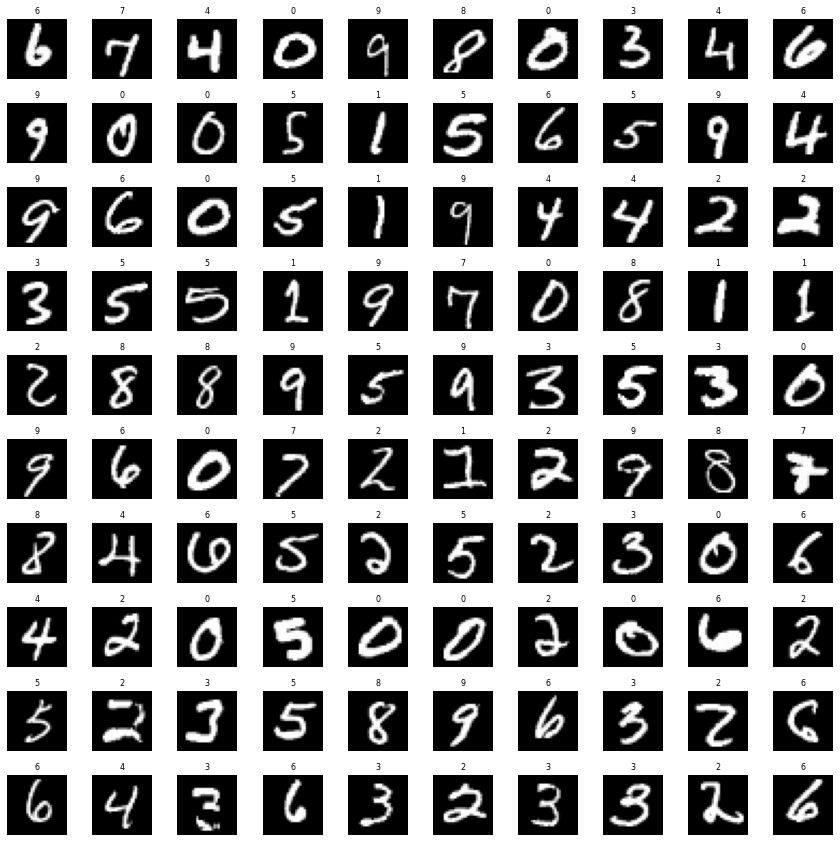

In [11]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))
#print(axes.shape)
axes = axes.ravel() # -> (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, width * height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(x_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [12]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [15]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [16]:
x_train.shape[0], x_train.shape[1] * x_train.shape[2]

(60000, 784)

In [17]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

In [18]:
x_train.shape

(60000, 784)

In [19]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [20]:
x_test.shape

(10000, 784)

### Building and training the linear autoencoder

In [21]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

autoencoder = Sequential()

#Encode
autoencoder.add(Dense(units = 128, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))

#Decode
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))


In [22]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [23]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
autoencoder.fit(x_train, x_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 9s 3ms/step - loss: 0.1544 - accuracy: 0.0100
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1101 - accuracy: 0.0113
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1012 - accuracy: 0.0125
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0967 - accuracy: 0.0129
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0935 - accuracy: 0.0135
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0912 - accuracy: 0.0135
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.0132
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0884 - accuracy: 0.0144
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.0137
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.086

### Encoding the images

In [25]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [27]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [28]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


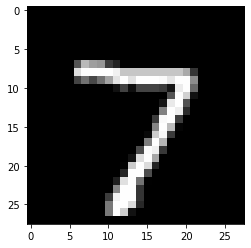

In [29]:
plt.imshow(x_test[0].reshape(28, 28), cmap = 'gray');

In [31]:
x_test[0].reshape(1, -1).shape

(1, 784)

In [32]:
encoded_image = encoder.predict(x_test[0].reshape(1, -1))

1/1 [==============================] - 0s 76ms/step


In [34]:
encoded_image, encoded_image.shape

(array([[ 3.5340774,  0.       ,  5.6003237,  5.911416 ,  7.3892336,
          2.3383043,  7.4512744,  7.97906  ,  6.4210668,  4.8257113,
          1.7801859, 12.049762 ,  3.3531032,  5.728172 ,  1.0625192,
          5.432782 ,  6.4997287,  5.7098684,  0.       ,  0.       ,
          3.1654572,  6.545152 ,  4.966593 ,  2.0474207,  7.9657245,
          2.5361524,  0.       ,  4.0191746,  3.9690807,  6.6944156,
          6.5254   ,  1.4907079]], dtype=float32), (1, 32))

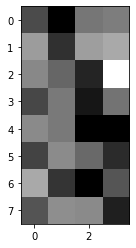

In [35]:
plt.imshow(encoded_image.reshape(8, 4), cmap = 'gray')

### Decoding the images

In [36]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [38]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs = input_layer_decoder, outputs =decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [39]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 48ms/step


In [40]:
decoded_image.shape

(1, 784)

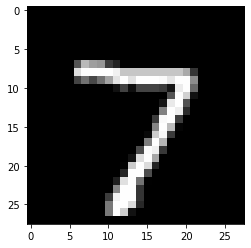

In [43]:
plt.imshow(x_test[0].reshape(28, 28), cmap = 'gray');

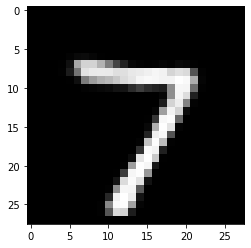

In [46]:
plt.imshow(decoded_image.reshape(28, 28), cmap = 'gray');

### Encoding and decoding the test images

In [47]:
x_test.shape[0]

10000

1/1 [==============================] - 0s 15ms/step


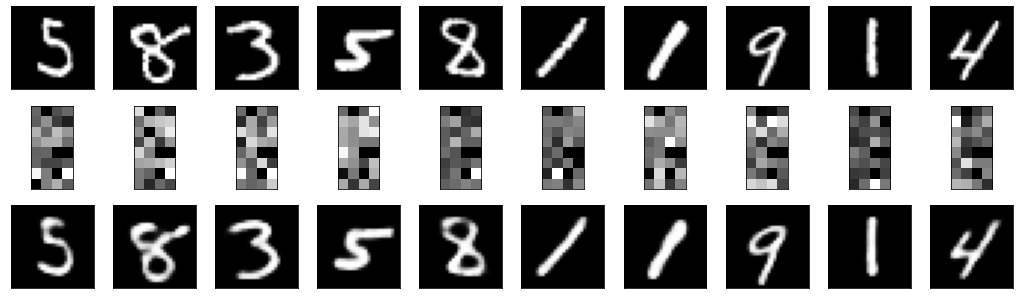

In [56]:
n_images = 10
test_image = np.random.randint(0, x_test.shape[0] - 1, size = n_images)
#print(test_image)
plt.figure(figsize = (18, 18))
for i, image_index in enumerate(test_image):
  #print(i, image_index)

  #Original Image
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  #Coded Image
  ax = plt.subplot(10, 10, i + 1 + n_images)
  encoded_image = encoder.predict(x_test[image_index].reshape(1, -1))
  plt.imshow(encoded_image.reshape(8, 4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  #Decoded Image
  ax = plt.subplot(10, 10, i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28, 28), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())